In [1]:
from sklearn.datasets import fetch_openml
import pandas as pd

mnist = fetch_openml("mnist_784", version=1, as_frame=False)

In [2]:
X, y = mnist.data, mnist.target

In [3]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [4]:
X.shape

(70000, 784)

In [5]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [6]:
y.shape

(70000,)

Display the image of MNIST dataset using Matplotlib imshow()

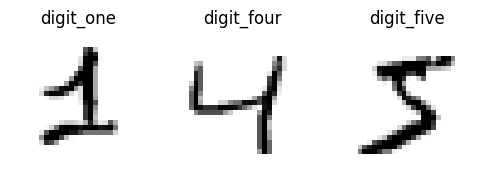

In [7]:
import matplotlib.pyplot as plt


def plot_digits(image):
    image = image.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")


digit_one = X[24]
digit_five = X[0]
digit_four = X[2]


plt.figure(figsize=(6, 3))

plt.subplot(1,3,1)
plot_digits(digit_one)
plt.title("digit_one")

plt.subplot(1, 3, 2)
plot_digits(digit_four)
plt.title("digit_four")

plt.subplot(1, 3, 3)
plot_digits(digit_five)
plt.title("digit_five")

plt.show()

In [8]:
y[24], y[0]

('1', '5')

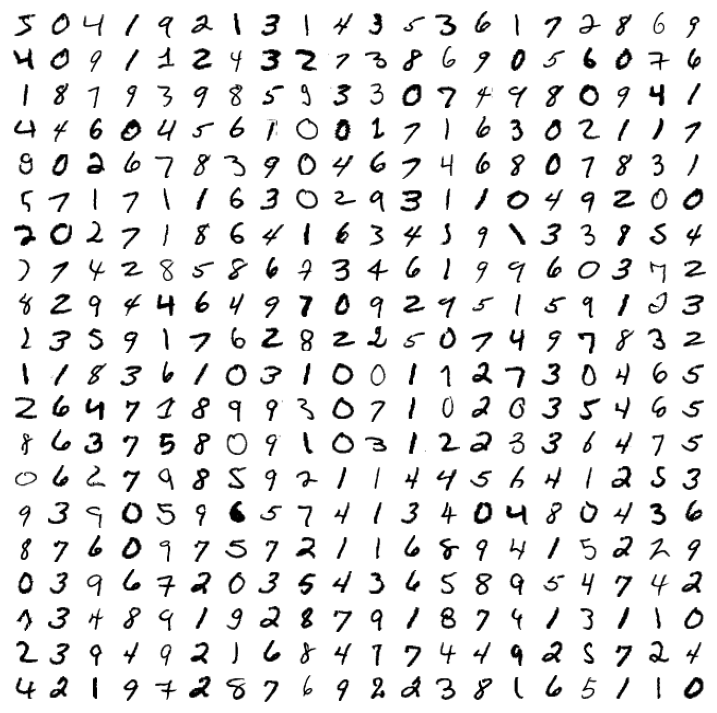

In [9]:
plt.figure(figsize=(9, 9))
for idx, img_data in enumerate(X[:400]):
    plt.subplot(20, 20, idx + 1)
    plot_digits(img_data)
# plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# StraifiedShuffleSplit can be used instead of train_test_split for stratified sampling as done here using stratify=y
# But train_test_split is more efficient in MNIST data

Training a Binary Classifier

This binary classifier is detecting digit 5 only

In [11]:
y_train_5 = y_train == "5"
y_test_5 = y_test == "5"

In [12]:
from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(random_state=42)
sgd_classifier.fit(
    X_train, y_train_5
)  # Adding this, now sgd_classifier can be used for detection of number 5

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [13]:
# Using sgd_classifier

sgd_classifier.predict(
    [digit_four]
)  # sgd_classifier is for digit 5 but some_digit is digit 1

# So array show False

array([False])

In [14]:
sgd_classifier.predict([digit_five])

# digit_five is actually digit 5 from MNIST dataset. So, answer is True

array([ True])

Measuring Accuary using Cross-Validation
Measuring the perform of SGDClassifier using k-fold cross-validation 

In [15]:
# It will take sometime

from sklearn.model_selection import cross_val_score

score = cross_val_score(sgd_classifier, X_train, y_train_5, cv=5, scoring="accuracy")

In [16]:
score

array([0.96330357, 0.96348214, 0.96616071, 0.97098214, 0.91705357])

In [17]:
pd.Series(score).describe()

count    5.000000
mean     0.956196
std      0.022100
min      0.917054
25%      0.963304
50%      0.963482
75%      0.966161
max      0.970982
dtype: float64

In [18]:
#Using StratifiedKFold instead of KFold

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfold = StratifiedKFold(n_splits=5)

for train_idx, test_idx in skfold.split(X_train, y_train_5):
    clone_clf = clone(sgd_classifier)
    X_train_fold = X_train[train_idx]
    X_test_fold = X_train[test_idx]
    y_train_fold = y_train_5[train_idx]
    y_test_fold = y_train_5[test_idx]

    clone_clf.fit(X_train_fold, y_train_fold)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9633035714285715
0.9634821428571428
0.9661607142857143
0.9709821428571429
0.9170535714285715


In [19]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

cross_val_score(dummy_clf, X_train, y_train_5, cv=5, scoring="accuracy")

False


array([0.90982143, 0.90982143, 0.90982143, 0.90982143, 0.90982143])

In [20]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_classifier, X_train, y_train_5, cv=5)

In [21]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[49500,  1450],
       [ 1003,  4047]])

In [22]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[50950,     0],
       [    0,  5050]])

In [23]:
from sklearn.metrics import precision_score, recall_score

precision_score(
    y_train_5, y_train_pred
)  # 4047 / (4047 + 1450) [Refers to Confusion Matrix]

0.7362197562306713

In [24]:
recall_score(
    y_train_5, y_train_pred
)  # 4047 / (4047 + 1003) [Refers to Confusion Matrix]

0.8013861386138614

In [25]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7674220157390728

In [26]:
y_score = sgd_classifier.decision_function([digit_five])
y_score

array([1102.40044114])

In [27]:
threshold = 0
y_digit_five_score = y_score > threshold
y_digit_five_score

array([ True])

In [28]:
threshold = 3000
y_digit_five_score = y_score > threshold
y_digit_five_score

array([False])

In [29]:
y_score = cross_val_predict(
    sgd_classifier, X_train, y_train_5, cv=5, method="decision_function"
)

In [30]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_score)

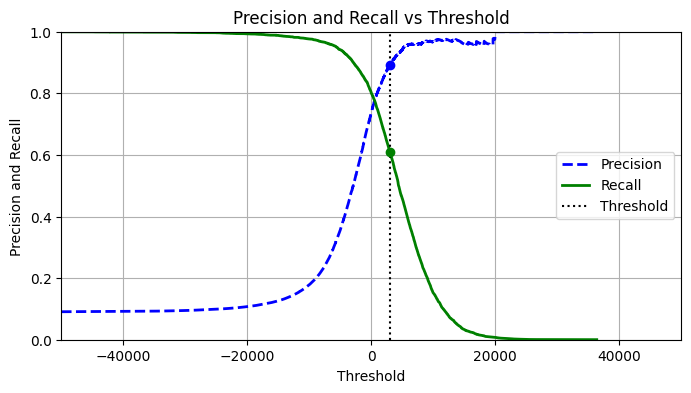

In [31]:
plt.figure(figsize=(8, 4))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="Threshold")

idx = (thresholds >= threshold).argmax() 
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.ylabel("Precision and Recall")
plt.title("Precision and Recall vs Threshold")
plt.legend(loc="center right")

plt.show()

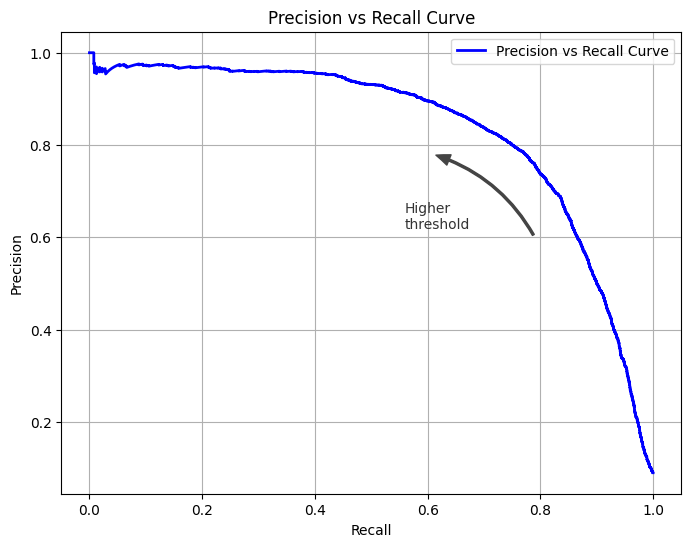

In [32]:
import matplotlib.patches as patches

plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, "b-", linewidth=2, label="Precision vs Recall Curve")
plt.title("Precision vs Recall Curve")
plt.grid()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.gca().add_patch(
    patches.FancyArrowPatch(
        (0.79, 0.60),
        (0.61, 0.78),
        connectionstyle="arc3,rad=.2",
        arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
        color="#444444",
    )
)
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.show()

In [33]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

np.float64(3264.1401108670275)

In [34]:
y_train_pred_90 = y_score >= threshold_for_90_precision
precision_score(y_train_5, y_train_pred_90)

0.9000603864734299

In [35]:
recall_score(y_train_5, y_train_pred_90)

0.5902970297029703

In [36]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_score)

In [37]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

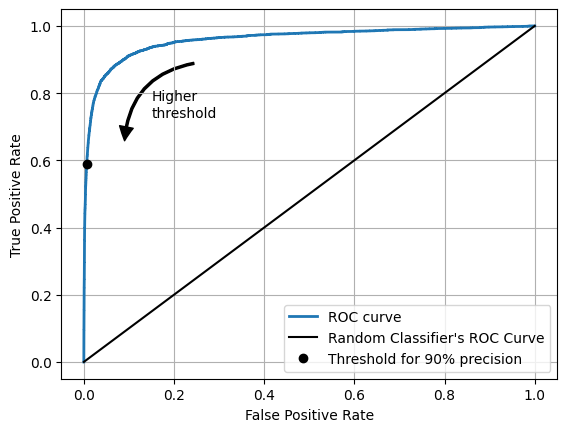

In [38]:
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], "k", label="Random Classifier's ROC Curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")
plt.grid()
plt.gca().add_patch(
    patches.FancyArrowPatch(
        (0.25, 0.89),
        (0.09, 0.65),
        connectionstyle="arc3, rad=.4",
        arrowstyle="Simple, tail_width=1.5, head_width=10, head_length=10",
        color="black",
    )
)
plt.text(0.15, 0.73, "Higher\nthreshold", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [39]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_score)

0.9600363897822558

Selecting Model

In [40]:
#Selecting the Model RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

forest_classifier = RandomForestClassifier(random_state=42)

In [41]:
y_score_forest = cross_val_score(
    forest_classifier, X_train, y_train, cv=5, scoring="accuracy"
)

In [42]:
y_score_forest

array([0.96866071, 0.96214286, 0.96785714, 0.96830357, 0.96785714])

In [43]:
forest_classifier.fit(X_train, y_train)
forest_classifier.score(X_test, y_test)

0.9672142857142857

In [44]:
y_prob_foreest = cross_val_predict(
    forest_classifier, X_train, y_train_5, cv=5, method="predict_proba"
)

In [45]:
y_prob_foreest[:2]

array([[0.97, 0.03],
       [1.  , 0.  ]])

In [46]:
y_score_forest = y_prob_foreest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
    y_train_5, y_score_forest
)

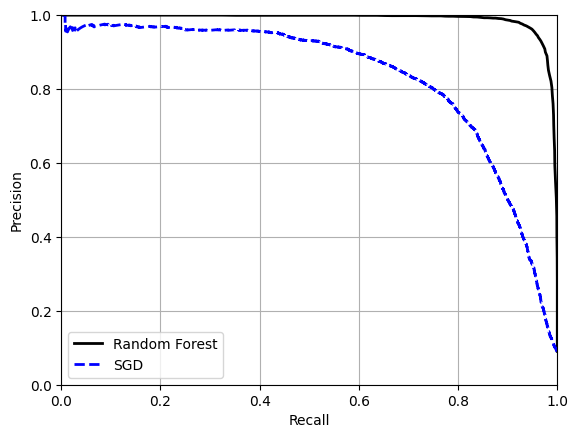

In [47]:
plt.plot(recalls_forest, precisions_forest, "k-", linewidth=2, label="Random Forest")
plt.plot(recalls, precisions, "b--", linewidth=2, label="SGD")
plt.grid()
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.show()

In [48]:
y_train_pred_forest = y_prob_foreest[:,1] >= 0.5

In [49]:
f1_score(y_train_5, y_train_pred_forest)

0.9330399245520277

In [50]:
roc_auc_score(y_train_5, y_score_forest)

0.9986667009978721

Multiclass Classification:
We use the binary classifier for predicting the multiclass classification
We train different model for predicting the different digits under one model

SVC does this. SVC is by default one-vs-one(OvO) model classifier.

In [51]:
from sklearn.svm import SVC

svc_classifier = SVC(random_state=42)
svc_classifier.fit(X_train[:2500], y_train[:2500])

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [52]:
svc_classifier.predict([digit_one])

# Training the SVC classifier on the whole dataset reduces the error in prediction

array(['2'], dtype=object)

In [53]:
svc_classifier.predict([digit_five])

array(['5'], dtype=object)

In [54]:
svc_classifier.predict([digit_four])

array(['4'], dtype=object)

In [55]:
digit_five_scores = svc_classifier.decision_function([digit_five])
digit_five_scores.round(3)

array([[ 0.77 ,  1.74 ,  5.076,  8.295, -0.301,  9.3  ,  2.767,  6.06 ,
         7.146,  3.892]])

In [56]:
digit_four_scores = svc_classifier.decision_function([digit_four])
digit_four_scores.round(3)

array([[ 1.765, -0.288,  4.019,  5.087,  9.293,  6.013,  1.807,  7.202,
         1.759,  8.257]])

In [57]:
class_id = digit_five_scores.argmax()
class_id

np.int64(5)

In [58]:
class_id_four = digit_four_scores.argmax()
class_id_four

np.int64(4)

In [59]:
svc_classifier.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [60]:
svc_classifier.classes_[class_id]

'5'

In [61]:
svc_classifier.classes_[class_id_four]

'4'

Converting the OvO to OvR:

-> OvO: ```OneVsOneClassifier```

-> OvR: ```OneVsRestClassifier```


In [62]:
from sklearn.multiclass import OneVsRestClassifier

ovr_classifier = OneVsRestClassifier(SVC(random_state=42))
ovr_classifier.fit(X_train[:2500], y_train[:2500])

,estimator,SVC(random_state=42)
,n_jobs,None
,verbose,0
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001


In [63]:
ovr_classifier.predict([digit_one])

array(['1'], dtype='<U1')

In [64]:
ovr_classifier.predict([digit_four])

array(['4'], dtype='<U1')

In [65]:
ovr_classifier.predict([digit_five])

array(['5'], dtype='<U1')

In [66]:
ovr_classifier.score(X_test, y_test)

0.933

In [67]:
# ovr_classifier_score = cross_val_score(
#     ovr_classifier, X_train, y_train, cv=3, scoring="accuracy"
# )
# ovr_classifier_score

```SGDClassifier``` is used for multiclass classification

In [68]:
sgd_classifier = SGDClassifier(random_state=42)
sgd_classifier.fit(X_train, y_train)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [69]:
sgd_classifier.predict([digit_one])

array(['1'], dtype='<U1')

In [70]:
sgd_classifier.predict([digit_four])

array(['4'], dtype='<U1')

In [71]:
sgd_classifier.predict([digit_five])

array(['3'], dtype='<U1')

The above data predicted using the ```SGDClassifier``` predicts the wrong value for digit 5 as array([3]).

This same problem raises in ```OnevsOneClassifier``` but solved in ```OnevsRestClassifier```.

In [72]:
# using ```decision_function````

sgd_classifier.decision_function([digit_five])

array([[-16951.72702042, -20114.97289119,  -9407.2973856 ,
          2534.97015539, -18384.25024129,   2072.97845031,
        -21309.62136633, -23955.17300096,  -4543.19867955,
        -12106.33618118]])

In [73]:
sgd_classifier.decision_function([digit_four])

array([[-27679.88490667, -28065.28540368,  -7594.49225607,
         -2181.68206423,    198.77484056, -11991.59044467,
        -30286.94797655,  -7758.26027636,  -8430.50327872,
        -10780.82386933]])

In [74]:
sgd_classifier.decision_function([digit_one])

array([[-18558.77360963,    260.31219675,  -6210.08434738,
         -2684.34019309, -17565.0720423 ,  -6320.00538765,
        -10565.29688601, -31122.90596627,  -2337.97548993,
        -12949.76107043]])

Using the ```decision_function```, we get the score for the ```SGDClassifier``` for the digits 5, 4 and 1 are negative value.

This means that classifier is not very confident about its predictions.

Lets measure the accuracy of the ```SGDClassifier```

In [75]:
cross_val_score(sgd_classifier, X_train, y_train, cv=5, scoring="accuracy")

array([0.86419643, 0.87946429, 0.87866071, 0.87410714, 0.881875  ])

In [76]:
sgd_classifier.score(X_test, y_test)

0.8754285714285714

Scaling the data: ```StandardScaler```

In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))

It takes time to execute

In [78]:
cross_val_score(sgd_classifier, X_train_scaled, y_train, cv=3, scoring="accuracy")

e:\code\AI-ML\MNIST\venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
e:\code\AI-ML\MNIST\venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.90196604, 0.8967697 , 0.90662167])

Error Analysis using Confusion Matrix

e:\code\AI-ML\MNIST\venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
e:\code\AI-ML\MNIST\venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


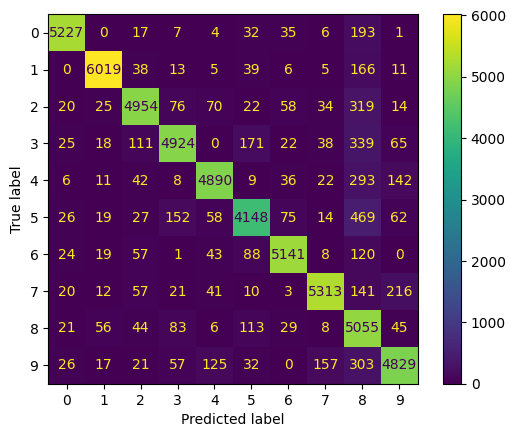

In [79]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_classifier, X_train_scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

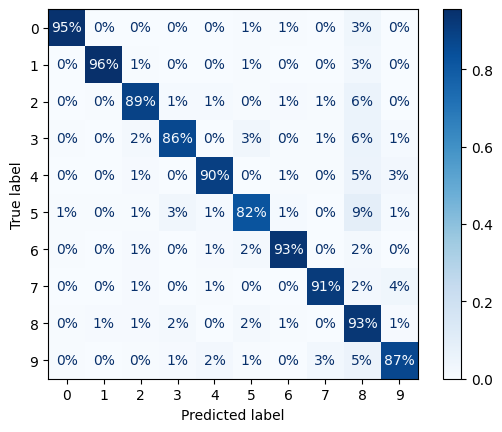

In [80]:
# Normalizing the Confusion Matrix

ConfusionMatrixDisplay.from_predictions(
    y_train, y_train_pred, normalize="true", values_format=".0%", cmap="Blues"
)

plt.show()

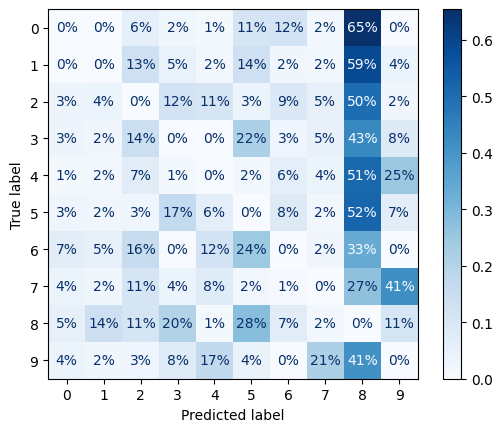

In [81]:
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(
    y_train, y_train_pred, sample_weight=sample_weight, normalize="true", values_format=".0%", cmap="Blues"
) 

plt.show()

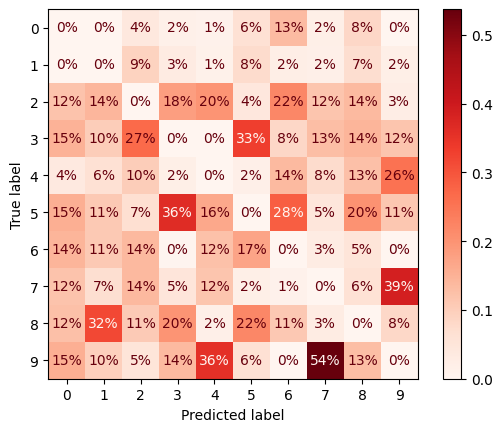

In [82]:
ConfusionMatrixDisplay.from_predictions(
    y_train, y_train_pred, sample_weight=sample_weight, normalize="pred", values_format=".0%", cmap="Reds"
)
plt.show()

In [83]:
cl_a, cl_b = '3', '5'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

Mutlilabel Classification

In [84]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = y_train >= '7'
y_train_odd = (y_train.astype(int) % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_multilabel)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [85]:
knn_classifier.predict([digit_one])

array([[False,  True]])

In [86]:
knn_classifier.predict([digit_four])

array([[False, False]])

In [87]:
knn_classifier.predict([digit_five])

array([[False,  True]])

```ClassifierChain``` is used for multilabel classification and chaining the classifiers.

In [88]:
from sklearn.multioutput import ClassifierChain

chain_classifier = ClassifierChain(SVC(), cv=5, random_state=42)
chain_classifier.fit(X_train[:2500], y_multilabel[:2500])

,estimator,SVC()
,order,None
,cv,5
,chain_method,'predict'
,random_state,42
,verbose,False
,base_estimator,'deprecated'
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'


In [89]:
chain_classifier.predict([digit_one])

array([[0., 1.]])

In [90]:
chain_classifier.predict([digit_four])

array([[0., 0.]])

In [91]:
chain_classifier.predict([digit_five])

array([[0., 1.]])

In [92]:
knn_classifier_cross_val_predict = cross_val_predict(knn_classifier, X_train, y_multilabel, cv=5)
f1_score(y_multilabel, knn_classifier_cross_val_predict, average='macro')

0.9776118983737925

In [ ]:
np.random.seed(42)
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

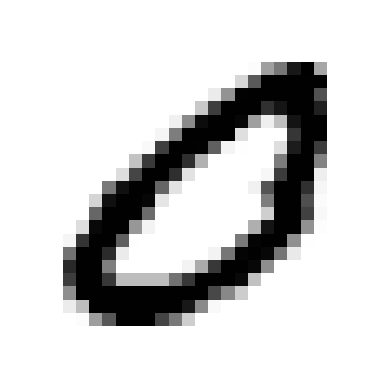

In [115]:
plot_digits(X_train[0])

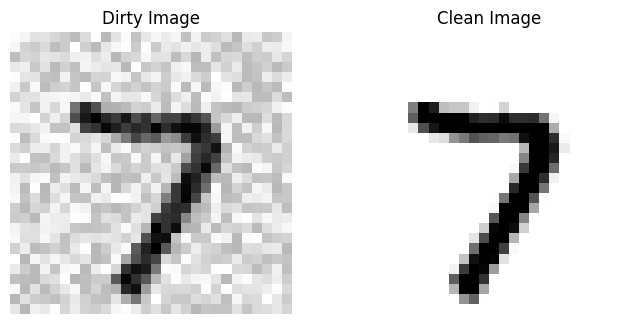

In [112]:
plt.figure(figsize=(8,7))

plt.subplot(1,2,1)
plot_digits(X_test_mod[0])
plt.title("Dirty Image")

plt.subplot(1,2,2)
plot_digits(y_test_mod[0])
plt.title("Clean Image")

plt.show()

In [98]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         3,  96, 136, 230, 255,  89,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  41, 165, 253, 253, 253, 253, 253,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

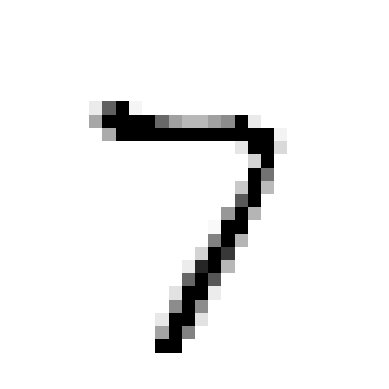

In [121]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_mod, y_train_mod)
clean_digit = knn_classifier.predict([y_test_mod[0]])
plot_digits(clean_digit)
plt.show()